# **Milestones 1**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Milestones : Milestones 1



## **1.2 Query**

> Pada Milestones ini dataset yang digunakan adalah dataset `ml_datasets` dari database bernama `credit_card_default` dengan menggunakan query sebagai berikut:

> SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 3996

## **1.3 Objective**

> Pada Milestones ini akan dilakukan pembuatan model machine learning Supervised Classification untuk memprediksi custemer `default_payment_next_month` pada database yang digunakan

# **2. Import Libraries** 

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 10.1 MB/s 


In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix


import warnings
warnings.filterwarnings(action='ignore')

> Code di atas merupakan daftar *library* yang digunakan dalam milestones ini

# **3. Data Loading** 

In [3]:
df = pd.read_csv('h8dsft_P1M1_Ropiudin.csv.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)

In [4]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0


In [5]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000,2,3,1,39,-1,-1,-1,-1,-2,-1,5280,5000,5000,0,0,5000,5000,5000,0,5000,5000,470,0
2961,110000,2,2,2,24,-1,-1,-1,-1,0,0,1362,1352,1867,36986,40053,41196,1352,1867,36986,5000,3000,23000,0
2962,160000,2,1,2,32,-1,-1,-1,-1,-1,-1,9441,5714,5030,3181,4998,1250,5726,5037,3182,5000,1252,749,0
2963,210000,2,1,1,38,0,0,-1,-1,0,0,8420,8106,4168,23067,19972,45864,3000,4521,24000,10000,30000,6432,0
2964,360000,2,2,1,37,-1,-1,0,-1,-1,-1,10000,17444,17165,10000,10000,10000,17444,10035,10000,10000,10000,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

> Berdasarkan hasil diatas diperoleh informasi bahwa dataset yang digunakan terdiri dari 2965 entri dan 24 kolom, dan dari hasil diatas juga diketahui bahwa pada dataset disetiap kolomnya tidak terdapat missing value hal ini diketahui dari jumlah kolom non-null disetiap kolom datasetnya sama dengan jumlah entri datanya

In [7]:
df[df.duplicated()].shape

(1, 24)

> Output diatas merupakan informasi terkait data duplikat, dari output diatas terdapat 1 data duplikat. Data duplikat ini akan dihapus pada tahapan selanjutnya

In [8]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000
mean,163369.309,1.608,1.850,1.560,35.193,0.005,-0.122,-0.142,-0.185,-0.225,-0.255,52118.305,50649.153,48239.758,44089.683,40956.081,39773.073,6348.903,6272.494,5150.497,4561.376,4913.287,5382.702,0.214
std,125030.415,0.488,0.778,0.522,9.109,1.114,1.181,1.184,1.178,1.159,1.167,72328.671,70785.002,68145.711,61907.454,58271.905,57303.489,20885.735,28879.675,14287.080,13281.500,16734.341,17275.953,0.410
min,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,-2.000,-11545.000,-67526.000,-25443.000,-46627.000,-46627.000,-73895.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3958.000,3390.000,3302.000,2582.000,1958.000,1430.000,1013.000,990.000,477.000,313.000,323.000,173.000,0.000
50%,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,0.000,24257.000,23111.000,21520.000,19894.000,18814.000,18508.000,2234.000,2175.000,1994.000,1600.000,1646.000,1615.000,0.000
75%,230000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,0.000,69852.000,67827.000,63023.000,58622.000,53373.000,52287.000,5087.000,5000.000,4500.000,4000.000,4021.000,4081.000,0.000
max,800000.000,2.000,6.000,3.000,69.000,8.000,7.000,7.000,8.000,7.000,7.000,613860.000,512650.000,578971.000,488808.000,441981.000,436172.000,493358.000,1227082.000,199209.000,202076.000,388071.000,403500.000,1.000


Berikut deskripsi disetiap kolom pada dataset berdasarkan sumber kaggle:

- `limit_balance`   : Jumlah kredit yang diberikan dalam dolar NT (termasuk kredit individu dan keluarga/tambahan)      
- `sex` : Jenis kelamin (1=laki-laki, 2=perempuan)
- `education_level` : Tingkat Pendidikan (1=S2, 2=S1, 3=SMA, 4=lainnya, 5=tidak diketahui, 6=tidak diketahui)         
- `marital_status`  : Status pernikahan (1=menikah, 2=lajang, 3=lainnya)           
- `age` : Usia di tahun ini            
- `pay_0`   : Status pembayaran pada bulan September 2005 (-1=membayar sebagaimana mestinya, 1=penundaan pembayaran selama satu bulan, 2=penundaan pembayaran selama dua bulan, ... 8=penundaan pembayaran selama delapan bulan, 9=penundaan pembayaran selama sembilan bulan ke atas)           
- `pay_2`   : Status pembayaran pada Agustus 2005 (skala sama seperti di atas) 
- `pay_3`   : Status pembayaran pada Juli 2005 (skala sama seperti di atas)               
- `pay_4`   : Status pembayaran pada Juni 2005 (skala sama seperti di atas)              
- `pay_5`   : Status pembayaran pada Mei 2005 (skala sama seperti di atas)              
- `pay_6`   : Status pembayaran pada April 2005 (skala sama seperti di atas)               
- `bill_amt_1`  : Jumlah tagihan pada bulan September 2005 (dolar NT)             
- `bill_amt_2`  : Jumlah tagihan pada bulan Agustus 2005 (dolar NT)               
- `bill_amt_3`  : Jumlah tagihan pada bulan Juli 2005 (dolar NT)            
- `bill_amt_4`  : Jumlah tagihan pada bulan Juni 2005 (dolar NT)               
- `bill_amt_5`  : Jumlah tagihan pada bulan Mei 2005 (dolar NT)              
- `bill_amt_6`  : Jumlah tagihan pada bulan April 2005 (dolar NT)               
- `pay_amt_1`   : Jumlah pembayaran sebelumnya pada bulan September 2005 (Dolar NT)              
- `pay_amt_2`   : Jumlah pembayaran sebelumnya pada bulan Agustus 2005 (Dolar NT)              
- `pay_amt_3`   : Jumlah pembayaran sebelumnya pada bulan Juli 2005 (Dolar NT)              
- `pay_amt_4`   : Jumlah pembayaran sebelumnya pada bulan Juni 2005 (Dolar NT)              
- `pay_amt_5`   : Jumlah pembayaran sebelumnya pada bulan Mei 2005 (Dolar NT)              
- `pay_amt_6`   : Jumlah pembayaran sebelumnya pada bulan April 2005 (Dolar NT)              
- `default_payment_next_month`  : Pembayaran default (1=ya, 0=tidak)

> Berdasarkan dari deskripsi data diatas, data dapat dikelompokkan menjadi data yang bertype numerik dan kategorik, yang mana data bertype kategorik merupakan data yang memiliki tingkatan seperti kolom `sex` yang memiliki tingkatan 1 untuk laki - laki, 2 untuk perempuan dst.

> Berikut dibawah ini dilakukan pengelompokan data numerik dan kategorik

In [9]:
num_col = ['limit_balance','age','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
           'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']
cat_col = ['sex', 'education_level', 'marital_status','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']

In [10]:
# numeric overview
df[num_col].describe()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000,2965.000
mean,163369.309,35.193,52118.305,50649.153,48239.758,44089.683,40956.081,39773.073,6348.903,6272.494,5150.497,4561.376,4913.287,5382.702
std,125030.415,9.109,72328.671,70785.002,68145.711,61907.454,58271.905,57303.489,20885.735,28879.675,14287.080,13281.500,16734.341,17275.953
min,10000.000,21.000,-11545.000,-67526.000,-25443.000,-46627.000,-46627.000,-73895.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,28.000,3958.000,3390.000,3302.000,2582.000,1958.000,1430.000,1013.000,990.000,477.000,313.000,323.000,173.000
50%,140000.000,34.000,24257.000,23111.000,21520.000,19894.000,18814.000,18508.000,2234.000,2175.000,1994.000,1600.000,1646.000,1615.000
75%,230000.000,41.000,69852.000,67827.000,63023.000,58622.000,53373.000,52287.000,5087.000,5000.000,4500.000,4000.000,4021.000,4081.000
max,800000.000,69.000,613860.000,512650.000,578971.000,488808.000,441981.000,436172.000,493358.000,1227082.000,199209.000,202076.000,388071.000,403500.000


> Bedasarkan hasil describe diatas, diketahui bahwa tidak terdapat keanehan pada data numerik, seperti terdapat data missing value 99999 dll, sehingga bisa diproses ke tahap selanjutnya

In [11]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

sex

2    1802
1    1163
Name: sex, dtype: int64
----------
education_level

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64
----------
marital_status

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64
----------
pay_0

 0    1516
-1     540
 1     356
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_0, dtype: int64
----------
pay_2

 0    1607
-1     580
 2     374
-2     353
 3      32
 4       8
 1       4
 7       3
 5       2
 6       2
Name: pay_2, dtype: int64
----------
pay_3

 0    1610
-1     580
 2     368
-2     367
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64
----------
pay_4

 0    1667
-1     532
-2     408
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype: int64
----------
pay_5

 0    1702
-1     504
-2     441
 2     280
 3      19
 4       9
 7       7
 5  

> Berdasarkan hasil gambaran dari data kategorik, diperoleh informasi label unique disetiap kolomnya.

> Pada kolom pay_0 memiliki penamaan yang tidak selarasan dengan kolom yang lainnya, yang mana pada kolom bill_amt dan pay_amt tidak memiliki nama 0 dibelakangnya, sehingga pada pay_0 akan di rubah menjadi pay_1 supaya selaras dengan kolom yang lain

> Berdasarkan deskripsi data, terdapat label unik pada data yang tidak memiliki arti, seperti pada kolom education_level terdapat label unik 0, yang mana berdasarkan deskripsi datanya tidak memiliki arti. Hal ini akan dilakukan transfromasi dengan cara memasukkan label unik 0 kedalam label unik 4, dan label unik 5 dan 6 akan dimasukkan juga ke dalam label unik 4, supaya memiliki arti lainnya. Hal ini dilakukan supaya tidak terjadi kerancuan terhadap pendeskripsian data.

> Transformasi juga dilakukan pada kolom yang memiliki label unik tidak memiliki arti pada data deskripsinya

# **4. Data Cleaning** 

In [12]:
df_clean = df.copy()
df_clean.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0


In [13]:
df[df.duplicated()].shape

(1, 24)

In [14]:
df_clean.drop_duplicates(inplace=True)
df_clean[df_clean.duplicated()].shape

(0, 24)

> Hasil diatas merupakan dataset yang sudah dilakukan penghapusan data yang duplikat, sehingga data sudah bersih dari data duplikat

In [15]:
df_clean.rename(columns = {"pay_0": "pay_1"}, inplace=True)

> Code diatas melakukan Perubahan nama kolom pay_0 menjadi pay_1

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2964 non-null   int64
 1   sex                         2964 non-null   int64
 2   education_level             2964 non-null   int64
 3   marital_status              2964 non-null   int64
 4   age                         2964 non-null   int64
 5   pay_1                       2964 non-null   int64
 6   pay_2                       2964 non-null   int64
 7   pay_3                       2964 non-null   int64
 8   pay_4                       2964 non-null   int64
 9   pay_5                       2964 non-null   int64
 10  pay_6                       2964 non-null   int64
 11  bill_amt_1                  2964 non-null   int64
 12  bill_amt_2                  2964 non-null   int64
 13  bill_amt_3                  2964 non-null   int64
 14  bill_amt

> Sehingga jika dilihat informasinya, kolom pay_0 sudah berubah menjadi pay_1

In [17]:
df_clean['education_level'] = df_clean['education_level'].replace({5:4, 6:4, 0:4})
df_clean['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

> Code diatas merupakan transformasi data yang mana pada kolom education_level label unik 0, 5 dan 6 dimasukkan ke dalam label unik 4, sehingga pada kolom education_level memiliki label unik 1, 2, 3, 4 dengan penjelasasan 1 = S2, 2 = S1, 3 = SMA dan 4 = Lainnya

In [18]:
df_clean['marital_status'] = df_clean['marital_status'].replace({0:3})
df_clean['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

> Sama seperti kolom education_level, pada kolom marital_status juga dilakukan transformasi pada datanya, yang mana label unik 0 dimasukkan kedalam label unik 3, sehingga pada kolom marital_status memilikin label unik yang sesuai berdasarkan deskripsi datanya

In [19]:
df_clean[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']] = df_clean[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']].replace({-2:-1})

In [20]:
a = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
for i in a:
    print(i)
    print()
    print(df_clean[i].value_counts())
    print('-' * 10)

pay_1

 0    1516
-1     787
 1     355
 2     262
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_1, dtype: int64
----------
pay_2

 0    1607
-1     932
 2     374
 3      32
 4       8
 1       4
 7       3
 5       2
 6       2
Name: pay_2, dtype: int64
----------
pay_3

 0    1610
-1     946
 2     368
 3      22
 4       8
 6       4
 5       3
 7       3
Name: pay_3, dtype: int64
----------
pay_4

 0    1667
-1     939
 2     324
 3      14
 4       7
 7       6
 5       5
 6       1
 8       1
Name: pay_4, dtype: int64
----------
pay_5

 0    1702
-1     944
 2     280
 3      19
 4       9
 7       7
 5       2
 6       1
Name: pay_5, dtype: int64
----------
pay_6

 0    1626
-1    1009
 2     297
 3      21
 7       6
 6       3
 4       2
Name: pay_6, dtype: int64
----------


> Code di atas merupakan transformasi data pada kolom pay_1, pay_2, pay_3, pay_4, pay_5 dan pay_6 yang mana pada label unik -2 akan dimasukkan ke dalam label unik -1 sehingga memiliki label unik berdasarkan deskripsi data 

# **5. Exploratory Data Analysis (EDA)** 

In [21]:
df_clean['default_payment_next_month'].value_counts().reset_index()

,index,default_payment_next_month
0,0,2329
1,1,635


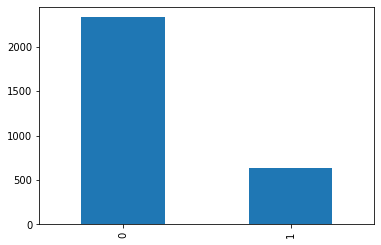

In [22]:
df_clean['default_payment_next_month'].value_counts().plot(kind='bar')

> Dari hasil diatas baik berdasarkan tabel atau grafik diperoleh informasi bahwa pada kolom data default_payment_next_month terdapat 2 label yaitu label 0 yang memiliki 2329 data dan 1 yang memiliki 635 data, dari hasil ini dapat disimpulkan bahwa pada kolom default_payment_next_month memiliki data yang imballance dan dapat disimpulkan juga pada dataset didominasi oleh custemer yang melakukan pembayaran lancar karna label 0 berartikan pembayaran yang lancar dibulan selanjutnya sedangkan 1 berarti custemer yang melakukan pembayaran yang tidak lancar dibulan selanjutnya. Dan pada kolom default_payment_next_month akan didefinisikan sebagai target

In [23]:
df_under = df_clean[
    (df_clean['default_payment_next_month'] == 0) 
].groupby(['marital_status'])['default_payment_next_month'].count().sort_values(ascending=False).reset_index()
df_under

,marital_status,default_payment_next_month
0,2,1267
1,1,1029
2,3,33


In [24]:
df_upper = df_clean[
    (df_clean['default_payment_next_month'] == 1) 
].groupby(['marital_status'])['default_payment_next_month'].count().sort_values(ascending=False).reset_index()
df_upper

,marital_status,default_payment_next_month
0,2,327
1,1,302
2,3,6


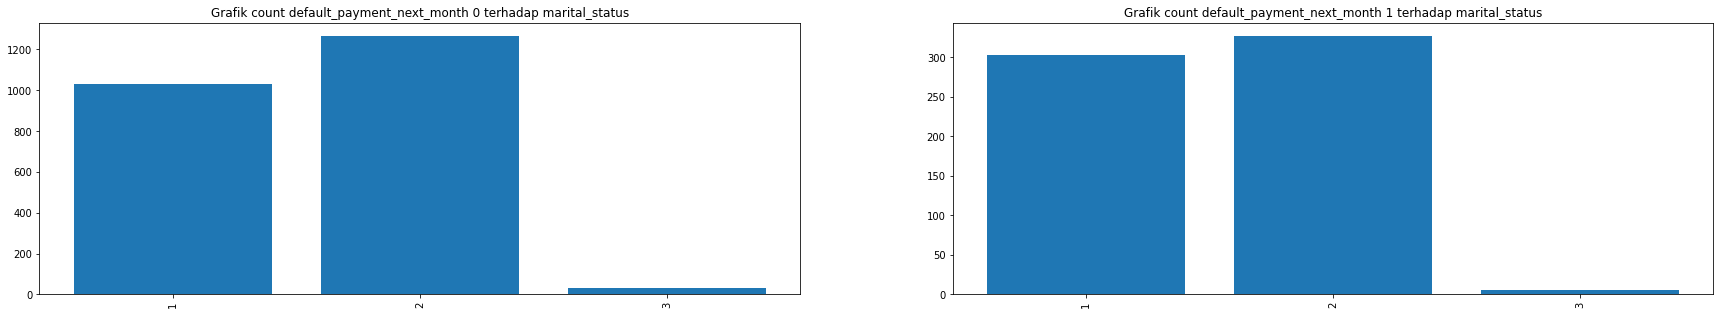

In [25]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
plt.bar(x=df_under['marital_status'], height=df_under['default_payment_next_month'])
plt.xticks(df_under['marital_status'])
plt.title('Grafik count default_payment_next_month 0 terhadap marital_status')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
plt.bar(x=df_upper['marital_status'], height=df_upper['default_payment_next_month'])
plt.xticks(df_upper['marital_status'])
plt.title('Grafik count default_payment_next_month 1 terhadap marital_status')
plt.xticks(rotation = 90)
plt.show()

> Dari hasil diatas baik berdasarkan tabel atau grafik diperoleh informasi terkait material_status apa saja yang terdapat pada label 0 dan 1, dikolom default_payment_next_month yang mana pada label 0, material_status 2 merupakan material_status terbanyak, yaitu sebanyak 1267 sedangkan material_status 3 merupakan material_status tersedikit, yaitu sebanyak 33, yang berartikan pada pembayaran yang lancar didominasi oleh custemer yang berstatus lajang 

> Pada label 1, material_status 2 merupakan material_status terbanyak, yaitu sebanyak 327 sedangkan material_status 3 merupakan material_status tersedikit, yaitu sebanyak 6 yang berarti pada pembayaran yang tidak lancar didominasi oleh custemer yang berstatus lajang

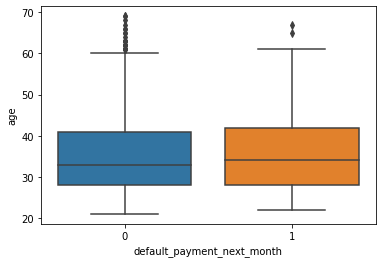

In [26]:
sns.boxplot(data=df_clean, x='default_payment_next_month', y='age')

> Dari hasil boxplot diatas antara age dan default_payment_next_month diperoleh informasi bahwa secara visual terdapat outlier, akan tetapi perlu diuji apakah emang betul outlier atau bukan pada tahapan selanjutnya

# **6. Data Preprocessing**

### **Splitting between `X` (Features), `y` (Target) and `inf` (Inference)**

> Pada tahapan ini akan dilakukan pembagian data pada dataset menjadi 3 data, yaitu data inference, data train dan data test

In [27]:
df_inf = df_clean.sample(5,random_state=0)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2338,20000,2,1,2,22,-1,-1,-1,-1,-1,-1,-9,-9,904,304,0,302,0,913,304,0,302,7676,0
643,100000,1,1,2,33,0,0,0,0,0,0,68073,64109,65302,73056,74034,44825,5000,3200,10000,10000,10000,10000,0
118,50000,1,2,1,32,0,0,0,0,0,0,42163,38252,27396,23584,17272,17634,1472,1500,1282,618,640,644,0
252,100000,1,1,2,24,-1,0,0,0,0,0,33921,34920,36030,37173,35875,36263,1563,1673,1816,1213,1248,1212,0
1313,340000,2,3,1,32,0,-1,0,0,0,0,11049,57301,59375,60216,59842,46882,57301,3000,2600,1000,1817,11022,0


In [28]:
df_clean = df_clean.drop(df_inf.index)
df_clean

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0
3,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
4,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,2,3,1,39,-1,-1,-1,-1,-1,-1,5280,5000,5000,0,0,5000,5000,5000,0,5000,5000,470,0
2961,110000,2,2,2,24,-1,-1,-1,-1,0,0,1362,1352,1867,36986,40053,41196,1352,1867,36986,5000,3000,23000,0
2962,160000,2,1,2,32,-1,-1,-1,-1,-1,-1,9441,5714,5030,3181,4998,1250,5726,5037,3182,5000,1252,749,0
2963,210000,2,1,1,38,0,0,-1,-1,0,0,8420,8106,4168,23067,19972,45864,3000,4521,24000,10000,30000,6432,0


In [29]:
df_clean.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000,2,1,2,22,-1,-1,-1,-1,-1,-1,-9,-9,904,304,0,302,0,913,304,0,302,7676,0
1,100000,1,1,2,33,0,0,0,0,0,0,68073,64109,65302,73056,74034,44825,5000,3200,10000,10000,10000,10000,0
2,50000,1,2,1,32,0,0,0,0,0,0,42163,38252,27396,23584,17272,17634,1472,1500,1282,618,640,644,0
3,100000,1,1,2,24,-1,0,0,0,0,0,33921,34920,36030,37173,35875,36263,1563,1673,1816,1213,1248,1212,0
4,340000,2,3,1,32,0,-1,0,0,0,0,11049,57301,59375,60216,59842,46882,57301,3000,2600,1000,1817,11022,0


> Code diatas merupakan pembagian data ke dalam data inference, yang mana data inferene ini akan digunakan pada model inference yang bertujuan untuk menguji model yang sudah dibuat berfungi atau tidak ketikan dimasukan data baru selain data train dan data test

In [30]:
# define feature and target
X = df_clean.drop('default_payment_next_month', axis=1)
y = df_clean['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
# for EDA model creation we will use dataframe stored in df_eda
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2071, 23)
(888, 23)
(2071,)
(888,)


> Code diatas merupakan pembagian data, yang mana dataset sebelumnya sudah di ambil sebagian untuk data inference. sisa datanya dibagi menjadi data train dan data test, yang mana saya melakukan pembagian data sebanyak 70% data train dan 30% data test

In [32]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(2071, 24)

## **6.1 Exploratory Data Analysis (EDA) - Modeling**

In [33]:
num_col = ['limit_balance','age','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
           'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']
cat_col = ['sex', 'education_level', 'marital_status','pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']

> Code diatas merupakan pendefinisian kolom mana saja yang termasuk kedalam kolom numerik dan kolom kategorik, hal ini bertujuan untuk mempermudah peroses selanjutnya

### **Numerical Feature**

In [34]:
df_eda[num_col].head()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
715,20000,24,16505,18817,18227,19632,20298,20337,2905,0,1720,1754,893,0
993,140000,26,101551,105246,104781,105334,107699,106828,5366,5087,3605,3894,3785,3304
921,130000,29,93761,100172,97727,98588,97129,98016,8901,0,3401,3509,3671,3240
2729,220000,54,265,4786,2367,2873,11768,7484,4786,2367,2888,11768,7484,13062
2306,300000,39,1117,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df_eda[num_col].shape

(2071, 14)

In [36]:
# numeric overview
df_eda[num_col].describe()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000,2071.000
mean,163307.581,34.979,52004.308,50419.820,48051.223,43711.682,40866.280,39847.294,6134.640,5807.373,5082.973,4794.159,4908.492,5253.035
std,123311.481,8.968,72572.832,71115.353,68381.320,62065.745,58479.973,57707.109,19226.316,16020.134,13535.126,14106.221,15995.245,16205.249
min,10000.000,21.000,-11545.000,-67526.000,-9850.000,-27490.000,-7941.000,-73895.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,28.000,3438.500,3098.000,2837.000,2400.000,1655.000,1274.500,1000.000,700.000,430.000,314.500,316.000,16.000
50%,140000.000,33.000,23551.000,22202.000,20650.000,19443.000,18656.000,18475.000,2200.000,2100.000,1950.000,1600.000,1600.000,1600.000
75%,240000.000,41.000,69961.500,67679.000,63011.500,58109.000,52910.000,51368.000,5098.500,5000.000,4469.000,4122.000,4106.500,4000.000
max,750000.000,69.000,613860.000,512650.000,578971.000,488808.000,427064.000,436172.000,405016.000,302961.000,182781.000,202076.000,388071.000,228300.000


#### **Handling Outlier**

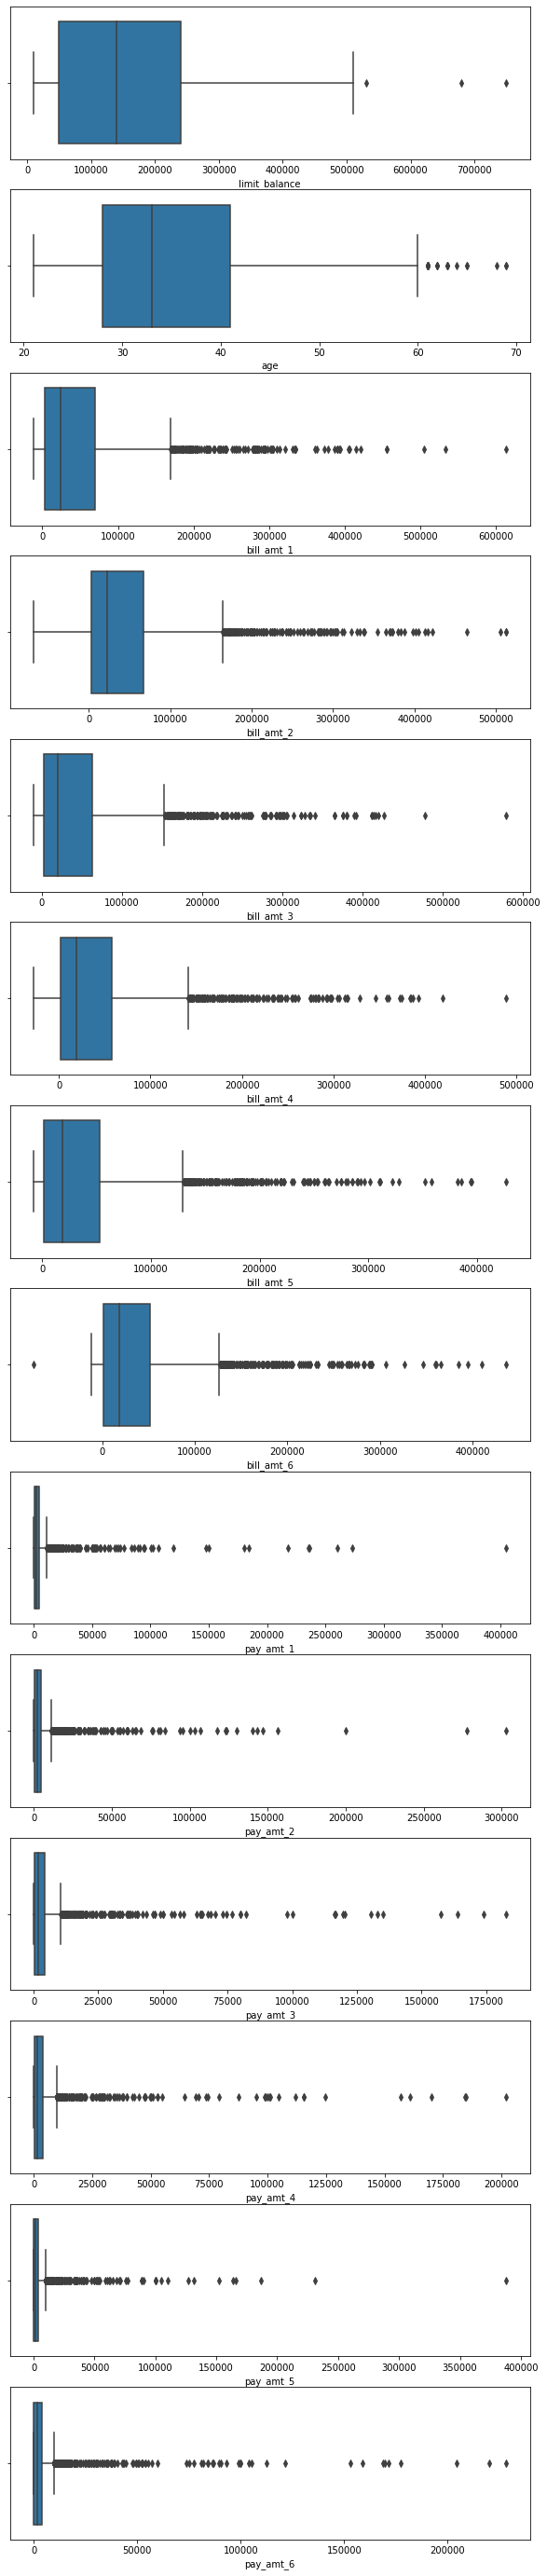

In [37]:
cols_name = ['limit_balance','age','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
           'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']

fig, ax = plt.subplots(ncols=1,nrows=14, figsize=[10,50])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[idx])

plt.show()

> Grafik boxplot diatas merupakan grafik pada kolom data numerik, dari hasil boxplot terdapat banyak outlier disetiap kolom numerik, akan tetapi belum diketahui berapa banyak outlier disetiap kolomnya, tahapan dibawah ini akan melihat seberapa banyak outlier disetiap kolom numerik

In [38]:
df_eda[num_col].skew()

limit_balance    0.923
age              0.816
bill_amt_1       2.458
bill_amt_2       2.449
bill_amt_3       2.537
bill_amt_4       2.460
bill_amt_5       2.408
bill_amt_6       2.450
pay_amt_1       10.973
pay_amt_2        9.540
pay_amt_3        7.369
pay_amt_4        8.126
pay_amt_5       11.813
pay_amt_6        7.945
dtype: float64

> Output diatas merupakan nilai skew disetiap kolom numerik, yang mana dari hasil diatas dapat disimpulkan kolom data numerik semuanya memiliki skew yang tidak normal, hal ini berguna untuk menentukan penggunaan handling outlier dan scaling

In [39]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda[col].mean() + 3*df_eda[col].std()
    lower = df_eda[col].mean() - 3*df_eda[col].std()
  else:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df_eda[(df_eda[col]>=lower) &  (df_eda[col]<=upper)]
  outliers = df_eda[(df_eda[col]<lower) | (df_eda[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['limit_balance','age','bill_amt_1','bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
           'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5','pay_amt_6']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_eda,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_eda))*100, '%') 
    print('-'*10)

limit_balance
count of outlier:  3
percentage of outlier:  0.14485755673587639 %
----------
age
count of outlier:  21
percentage of outlier:  1.0140028971511348 %
----------
bill_amt_1
count of outlier:  151
percentage of outlier:  7.291163689039111 %
----------
bill_amt_2
count of outlier:  158
percentage of outlier:  7.629164654756157 %
----------
bill_amt_3
count of outlier:  160
percentage of outlier:  7.72573635924674 %
----------
bill_amt_4
count of outlier:  148
percentage of outlier:  7.146306132303234 %
----------
bill_amt_5
count of outlier:  172
percentage of outlier:  8.305166586190246 %
----------
bill_amt_6
count of outlier:  172
percentage of outlier:  8.305166586190246 %
----------
pay_amt_1
count of outlier:  188
percentage of outlier:  9.07774022211492 %
----------
pay_amt_2
count of outlier:  194
percentage of outlier:  9.367455335586673 %
----------
pay_amt_3
count of outlier:  184
percentage of outlier:  8.884596813133752 %
----------
pay_amt_4
count of outlier:  2

> Berdasarkan hasil output diatas diketahui banyaknya outlier disetiap kolomnya, yang mana rata - rata outlier pada kolom diatas 5%, dan hanya 2 kolom yang memiliki outlier di bawah 5%. Dari hasil diatas akan dilakukan handling outlier terhadap kolom yang memiliki outlier dibawah 5% yaitu kolom limit_balance dan age dengan cara dicapping menggunakan winsorizer. Capping winsorizer berfungsi untuk mengcapping pada data testing dan inference pada tahap selanjutnya

> Akan tetapi pada kolom age, tidak sesuai apabila dilakukan capping, misal umur 80 dicapping ke dalam umur 70 yang berarti merubah custemer berumur 80 menjadi umur 70, hal ini agak aneh dilakukan, sehingga pada kolom age tidak dilakukan capping. Sehingga untuk capping outlier hanya pada kolom limit_balance

In [40]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['limit_balance'])

df_eda_cleaned = wins.fit_transform(df_eda)

> Capping outlier menggunakan capping metode iqr, dikarnakan kolom limit_balance tidak berdistribusi normal atau skew sehingga melakukan capping winsorizer dengan capping metode iqr

In [41]:
# Compare before and after outlier handling
print('before handling: \n', df_eda.describe())

before handling: 
        limit_balance      sex  education_level  marital_status      age  \
count       2071.000 2071.000         2071.000        2071.000 2071.000   
mean      163307.581    1.610            1.848           1.563   34.979   
std       123311.481    0.488            0.734           0.521    8.968   
min        10000.000    1.000            1.000           1.000   21.000   
25%        50000.000    1.000            1.000           1.000   28.000   
50%       140000.000    2.000            2.000           2.000   33.000   
75%       240000.000    2.000            2.000           2.000   41.000   
max       750000.000    2.000            4.000           3.000   69.000   

         pay_1    pay_2    pay_3    pay_4    pay_5    pay_6  bill_amt_1  \
count 2071.000 2071.000 2071.000 2071.000 2071.000 2071.000    2071.000   
mean     0.092   -0.006   -0.014   -0.042   -0.076   -0.095   52004.308   
std      1.004    1.029    1.042    1.012    0.976    0.988   72572.832   
min  

In [42]:
print('after handling: \n', df_eda_cleaned.describe())

after handling: 
        limit_balance      sex  education_level  marital_status      age  \
count       2071.000 2071.000         2071.000        2071.000 2071.000   
mean      163121.680    1.610            1.848           1.563   34.979   
std       122617.573    0.488            0.734           0.521    8.968   
min        10000.000    1.000            1.000           1.000   21.000   
25%        50000.000    1.000            1.000           1.000   28.000   
50%       140000.000    2.000            2.000           2.000   33.000   
75%       240000.000    2.000            2.000           2.000   41.000   
max       525000.000    2.000            4.000           3.000   69.000   

         pay_1    pay_2    pay_3    pay_4    pay_5    pay_6  bill_amt_1  \
count 2071.000 2071.000 2071.000 2071.000 2071.000 2071.000    2071.000   
mean     0.092   -0.006   -0.014   -0.042   -0.076   -0.095   52004.308   
std      1.004    1.029    1.042    1.012    0.976    0.988   72572.832   
min   

> Setelah melakukan capping, selanjutnya dilihat perbedaan setelah dan sebelum capping, dari hasil diatas terlihat perbedaan pada kolom limit_balance setelah dan sebelum dicapping, hal ini berarti capping pada kilom limit_balance berhasil dilakukan 

### **Categorical Feature**

In [43]:
df_eda_cleaned[cat_col].head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
715,2,2,1,0,0,2,0,0,2,1
993,2,2,2,0,0,0,0,0,0,1
921,2,1,2,0,0,2,0,0,0,0
2729,2,2,1,-1,-1,-1,-1,-1,-1,0
2306,2,3,1,-1,-1,-1,-1,-1,-1,0


> Dikarnakan pada kolom kategorik sudah di encoding ke data numerik, sehingga pada data kategorik tidak dilakukan endocing dan bisa dilanjutkan ke tahap selanjutnya yaitu feature selection

### **Feature Selection**

**Feature Selection untuk data feature numerik dengan menggunakan Correlation**

In [44]:
df_num = df_eda_cleaned[num_col + ['default_payment_next_month']]
df_num.head()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
715,20000.000,24,16505,18817,18227,19632,20298,20337,2905,0,1720,1754,893,0,1
993,140000.000,26,101551,105246,104781,105334,107699,106828,5366,5087,3605,3894,3785,3304,1
921,130000.000,29,93761,100172,97727,98588,97129,98016,8901,0,3401,3509,3671,3240,0
2729,220000.000,54,265,4786,2367,2873,11768,7484,4786,2367,2888,11768,7484,13062,0
2306,300000.000,39,1117,0,0,0,0,0,0,0,0,0,0,0,0


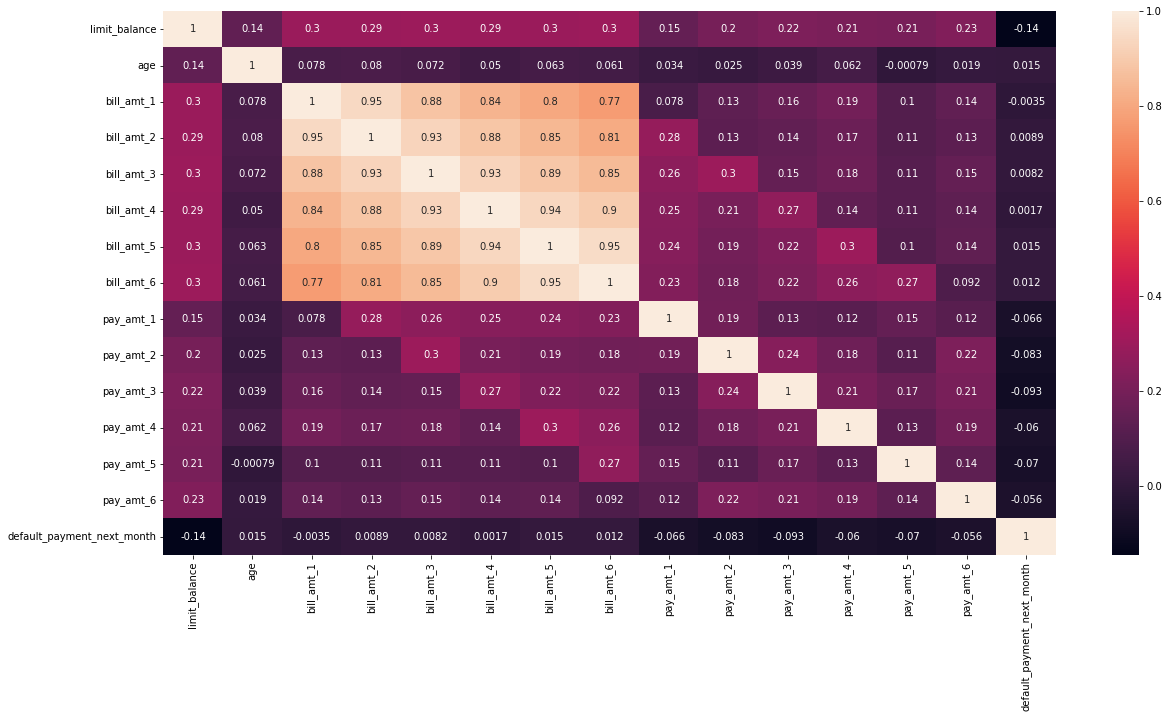

In [45]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_num.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

**Feature Selection untuk data feature kategorik dengan menggunakan Correlation**

In [46]:
df_cat = df_eda_cleaned[cat_col]
df_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
715,2,2,1,0,0,2,0,0,2,1
993,2,2,2,0,0,0,0,0,0,1
921,2,1,2,0,0,2,0,0,0,0
2729,2,2,1,-1,-1,-1,-1,-1,-1,0
2306,2,3,1,-1,-1,-1,-1,-1,-1,0


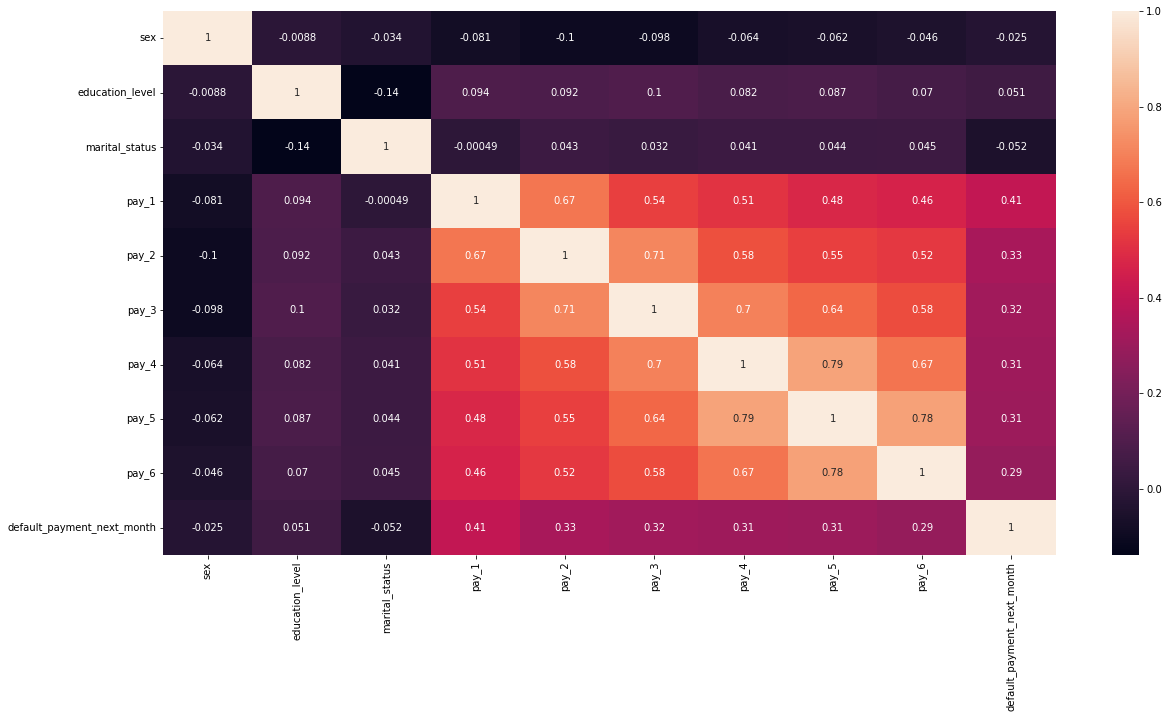

In [47]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [48]:
#Cek Multicollinearity

df_pay = df_cat[['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']]

vif_data = pd.DataFrame()
vif_data["feature"] = df_pay.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_pay.values, i) for i in range(len(df_pay.columns))]

vif_data

,feature,VIF
0,pay_1,1.897
1,pay_2,2.687
2,pay_3,2.754
3,pay_4,3.257
4,pay_5,3.874
5,pay_6,2.722


> Dari hasil correlation diatas, saya menetapkan untuk mengambil kolom yang memiliki nilai correlation lebih dari sama dengan 0.1, sehingga berdasarkan hasil correlation diatas diperoleh kolom feature sebagai berikut: `limit_balance`, `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5`,`pay_6` dan `default_payment_next_month`. Akan tetapi pada kolom `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5` dan `pay_6` memiliki nilai correlation diatas batas yang ditentukan, hal ini perlu diliat Multicollinearity dari 6 kolom tersebut apakah memiliki hubungan atau tidak

> Berdasarkan nilai VIF yang diperoleh, dapat disimpulkan bahwa kolom `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5` dan `pay_6` tidak saling berhubungan karna nilai VIF dibawah 5.

In [49]:
df_eda_cleaned = df_eda_cleaned[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']]
df_eda_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
715,20000.000,0,0,2,0,0,2,1
993,140000.000,0,0,0,0,0,0,1
921,130000.000,0,0,2,0,0,0,0
2729,220000.000,-1,-1,-1,-1,-1,-1,0
2306,300000.000,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...
763,170000.000,0,0,0,0,0,0,0
835,70000.000,1,2,2,0,0,2,1
1653,290000.000,0,0,0,0,0,0,0
2607,30000.000,1,2,2,-1,0,0,1


### **Feature Scaling**

In [50]:
num_col = ['limit_balance']
scaler = MinMaxScaler()

df_eda_cleaned[num_col] = scaler.fit_transform(df_eda_cleaned[num_col])
df_eda_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
715,0.019,0,0,2,0,0,2,1
993,0.252,0,0,0,0,0,0,1
921,0.233,0,0,2,0,0,0,0
2729,0.408,-1,-1,-1,-1,-1,-1,0
2306,0.563,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...
763,0.311,0,0,0,0,0,0,0
835,0.117,1,2,2,0,0,2,1
1653,0.544,0,0,0,0,0,0,0
2607,0.039,1,2,2,-1,0,0,1


> Pada tahapan Feature Scaling, kolom numerik limit_balance dilakukan scaling dengan menggunakan MinMaxScaler, dikarnakan kolom limit_balance memiliki distribusi yang tidak normal atau skew. Feature scaling ini bertujuan untuk menormalisasikan data numerik

Berdasarkan proses pada tahap Exploratory Data Analysis (EDA) - Modeling pada data traning dapat direkap sebagai berikut:
1. Handling outlier pada kolom `limit_balance`
2. Feature Selection yang diperoleh adalah  `limit_balance`, `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5`,`pay_6` dan `default_payment_next_month`
3. Feature Scaling pada kolom data numerik

## **6.2 Data Preprocessing**

Pada data preprocesing tahapan yang dilakukan sama dengan Exploratory Data Analysis (EDA) - Modeling pada data traning, hanya saja data yang digunakan adalah data testing, sehingga pada tahapan data preprocesing sebagai berikut:
1. Handling outlier pada kolom `limit_balance`
2. Feature Selection yang diperoleh adalah  `limit_balance`, `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5`,`pay_6` dan `default_payment_next_month`
3. Feature Scaling pada kolom data numerik

In [51]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1592,480000,2,2,1,31,0,0,0,0,0,0,20824,21960,20885,19949,23031,27176,5004,5000,795,5000,5000,10000,0
643,180000,1,1,1,63,0,0,0,0,0,0,157932,156847,130572,120464,109129,112273,7000,5500,4218,4500,5000,4000,0
118,50000,1,3,1,43,0,0,2,0,0,0,7978,11396,8900,8565,8590,19894,3887,0,453,312,1500,500,0
252,170000,1,1,2,24,0,0,0,0,0,2,169883,171851,158426,96704,101555,97884,6808,4625,3510,9100,0,3500,0
2803,210000,2,3,2,30,-1,-1,-1,-1,-1,-1,1661,5793,1181,1031,1430,1031,5793,1181,1031,1430,1031,1031,0


#### **Handling Outlier**

In [52]:
# capping outlier
testing = wins.transform(testing)
testing.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1592,480000.000,2,2,1,31,0,0,0,0,0,0,20824,21960,20885,19949,23031,27176,5004,5000,795,5000,5000,10000,0
643,180000.000,1,1,1,63,0,0,0,0,0,0,157932,156847,130572,120464,109129,112273,7000,5500,4218,4500,5000,4000,0
118,50000.000,1,3,1,43,0,0,2,0,0,0,7978,11396,8900,8565,8590,19894,3887,0,453,312,1500,500,0
252,170000.000,1,1,2,24,0,0,0,0,0,2,169883,171851,158426,96704,101555,97884,6808,4625,3510,9100,0,3500,0
2803,210000.000,2,3,2,30,-1,-1,-1,-1,-1,-1,1661,5793,1181,1031,1430,1031,5793,1181,1031,1430,1031,1031,0


### **Feature Selection**

In [53]:
testing_cleaned = testing[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']]
testing_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
1592,480000.000,0,0,0,0,0,0,0
643,180000.000,0,0,0,0,0,0,0
118,50000.000,0,0,2,0,0,0,0
252,170000.000,0,0,0,0,0,2,0
2803,210000.000,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...
477,70000.000,0,0,0,0,0,0,1
2225,440000.000,0,-1,-1,-1,-1,0,0
2667,260000.000,-1,-1,-1,-1,-1,0,0
2480,20000.000,-1,-1,-1,-1,-1,-1,0


### **Feature Scaling**

In [54]:
num_col = ['limit_balance']

testing_cleaned[num_col] = scaler.transform(testing_cleaned[num_col])
testing_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
1592,0.913,0,0,0,0,0,0,0
643,0.330,0,0,0,0,0,0,0
118,0.078,0,0,2,0,0,0,0
252,0.311,0,0,0,0,0,2,0
2803,0.388,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...
477,0.117,0,0,0,0,0,0,1
2225,0.835,0,-1,-1,-1,-1,0,0
2667,0.485,-1,-1,-1,-1,-1,0,0
2480,0.019,-1,-1,-1,-1,-1,-1,0


In [55]:
X_train = df_eda_cleaned.drop('default_payment_next_month',axis=1).copy()
y_train = df_eda_cleaned['default_payment_next_month']

X_test = testing_cleaned.drop('default_payment_next_month',axis=1).copy()
y_test = testing_cleaned['default_payment_next_month']

# **7. Modeling** 

## **7.1. Model Definition**

In [56]:
log_model = LogisticRegression(random_state=0)
svm_model = SVC(random_state=0)
dt_model = DecisionTreeClassifier(random_state=0)
rnd_model = RandomForestClassifier(random_state=0)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
ada_model = AdaBoostClassifier(random_state=0)

> Pada tahap model definition, model yang digunakan sebagai berikut:
1. Logistic Regression
2. SVM
3. Decision Tree Classifier
4. RandomForestClassifier
5. KNN
6. Naive Bayes
7. AdaBoost

> Dari model - model ini akan dilihat score cross validation berdasarkan akurasi mean dan std, sehingga diperoleh satu model yang nantinya akan digunakan pada tahap selanjutnya

## **7.2. Model Training**

In [57]:
# Logistic Regression
log_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [58]:
# SVM
svm_model.fit(X_train,y_train)

SVC(random_state=0)

In [59]:
# Decision Tree
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
# Random Forest
rnd_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [61]:
# KNN
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
# Naive Bayes
nb_model.fit(X_train, y_train)

GaussianNB()

In [63]:
# AdaBoost
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

> Pada tahap model traning, dilakukan traning dimasing - masing model yang digunakan 

## **7.3. Model Evaluation**

### **Cross Validation**

In [64]:
# Logistic Regression
log_model_train_cross_val = cross_val_score(log_model, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', log_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', log_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8377638088586229
accuracy Score - Std - Cross Validation  :  0.02109964354622923


In [65]:
# SVM
svm_model_train_cross_val = cross_val_score(svm_model, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', svm_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', svm_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8392072638379606
accuracy Score - Std - Cross Validation  :  0.02001805170805177


In [66]:
# Decision Tree
dt_model_train_cross_val = cross_val_score(dt_model, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', dt_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', dt_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8087864501484198
accuracy Score - Std - Cross Validation  :  0.012090782084524607


In [67]:
# Random Forest
rnd_model_train_cross_val = cross_val_score(rnd_model, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', rnd_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', rnd_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8145788952913101
accuracy Score - Std - Cross Validation  :  0.014485666169968369


In [68]:
# KNN
knn_model_train_cross_val = cross_val_score(knn_model, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', knn_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', knn_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.822313020196729
accuracy Score - Std - Cross Validation  :  0.010993617645327873


In [69]:
# Naive Bayes
nb_model_train_cross_val = cross_val_score(nb_model, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', nb_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', nb_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8140981316570631
accuracy Score - Std - Cross Validation  :  0.010270280028776507


In [70]:
# AdaBoost
ada_model_train_cross_val = cross_val_score(ada_model, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', ada_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', ada_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8416250509283509
accuracy Score - Std - Cross Validation  :  0.01796019923037802


In [88]:
rata = []
dev = []
for i in [log_model_train_cross_val,svm_model_train_cross_val,
          dt_model_train_cross_val,rnd_model_train_cross_val,
          knn_model_train_cross_val,nb_model_train_cross_val,
          ada_model_train_cross_val]:
    rata.append(i.mean())
    dev.append(i.std())

model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes' ,'AdaBoost']
hasil_cros_validation = pd.DataFrame(model)
hasil_cros_validation['mean']=rata
hasil_cros_validation['std']=dev

hasil_cros_validation.sort_values(by= 'mean' , ascending = False)

,0,mean,std
6,AdaBoost,0.842,0.018
1,SVM,0.839,0.020
0,Logistic Regression,0.838,0.021
4,KNN,0.822,0.011
3,Random Forest,0.815,0.014
5,Naive Bayes,0.814,0.010
2,Decision Tree,0.809,0.012


> Pada tahap ini dilakukan cross validation dimasing - masing model dan dilihat akurasi mean dan standar deviasinya, suatu model dikatakan baik berdasarkan cross validation dengan nilai mean tinggi dan nilai standar deviasi rendah.

> Dari hasil cross validation diatas diketahui bahwa model adaboost merupakan model terbaik dibandingkan model yang lainnya dikarnakan model adaboost memiliki nilai akurasi mean tinggi dan nilai akurasi standar deviasi rendah, sehingga model adaboost dipilih untuk ke tahap selanjutnya. Walawpun nilai akurasi standar deviasi di model adaboost bukan paling kecil, akan tetapi selisih dengan akurasi standar deviasi model lain tidak terlalu besar, oleh karna itu saya menggunakan model adaboost untuk tahap selanjutnya 

### **Hyperparameter Tuning**

In [82]:
params = [
    {'n_estimators': [50, 100, 150, 200, 250],       
     'learning_rate': [0.001, 0.01, 0.1, 0.5],            
     'base_estimator': [DecisionTreeClassifier(max_depth=3),DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=5)],              
     'algorithm': ["SAMME.R", "SAMME"]}]

ada_model = AdaBoostClassifier(random_state=0)

grid_search = GridSearchCV(ada_model, params, cv=5,
                           scoring='recall',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid=[{'algorithm': ['SAMME.R', 'SAMME'],
                          'base_estimator': [DecisionTreeClassifier(max_depth=3),
                                             DecisionTreeClassifier(max_depth=4),
                                             DecisionTreeClassifier(max_depth=5)],
                          'learning_rate': [0.001, 0.01, 0.1, 0.5],
                          'n_estimators': [50, 100, 150, 200, 250]}],
             return_train_score=True, scoring='recall')

> Code diatas merupakan code untuk melalukan hyperparameter tuning, dimana pada tahapan ini saya menetapkan sebanyak 120 kombinasi hyperparamete dan akan ditentukan kombinasi hyperparameter mana yang terbaik, yang nantinya ditetapkan sebagai model akhir dan digunakan untuk model inference

> Pada hyperparameter tuning, scoring yang saya gunakan adalah recall, dikarnakan pada kasus data ini ingin difokuskan mengurangi kesalahan negatif yang mana kelas 1 pada kolom default_payment_next_month yang berarti custemer yang melakukan pembayaran secara tidak lancar dibulan selanjutnya didefinisikan sebagai positif. Sehingga dengan menggunakan scoring recall, kita menghindari kesalahan prediksi pada kelas 1, atau dengan kata lain mengurangi kesalahan negatif.

> Hal itu dikarnakan, tidak ingin terjadinya kesalahan prediksi yang seharusnya custemer itu diprediksi sebagai custemer yang melakukan pembayaran secara tidak lancar dibulan selanjutnya malah diprediksi sebagai custemer yang melakukan pembayaran secara lancar dibulan selanjutnya hal itu dapat merugikan perusahaan dalam menetapkan kebijakan selanjutnya

In [83]:
grid_search.best_params_

{'algorithm': 'SAMME',
 'base_estimator': DecisionTreeClassifier(max_depth=4),
 'learning_rate': 0.5,
 'n_estimators': 200}

> Dari hasil hyperparameter tuning diperoleh parameter terbaik pada model adaboost yaitu:

- algorithm = 'SAMME'
- base_estimator = DecisionTreeClassifier(max_depth=4)
- learning_rate = 0.5
- n_estimators = 200

> Parameter ini nantinya digunakan untuk model inference

In [84]:
grid_search.best_score_

0.4278345250255363

In [85]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [86]:
model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1629
           1       0.79      0.45      0.57       442

    accuracy                           0.86      2071
   macro avg       0.83      0.71      0.74      2071
weighted avg       0.85      0.86      0.84      2071

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       695
           1       0.61      0.36      0.45       193

    accuracy                           0.81       888
   macro avg       0.73      0.65      0.67       888
weighted avg       0.79      0.81      0.79       888



### **Perbandingan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning**

In [89]:
# Sebelum

ada_model = AdaBoostClassifier(random_state=0)

ada_model.fit(X_train, y_train)

ada_model_train = ada_model.predict(X_train)
ada_model_test = ada_model.predict(X_test)

print(classification_report(y_train, ada_model_train))
print(classification_report(y_test, ada_model_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1629
           1       0.75      0.43      0.54       442

    accuracy                           0.85      2071
   macro avg       0.81      0.69      0.73      2071
weighted avg       0.84      0.85      0.83      2071

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       695
           1       0.64      0.39      0.49       193

    accuracy                           0.82       888
   macro avg       0.75      0.67      0.69       888
weighted avg       0.80      0.82      0.80       888



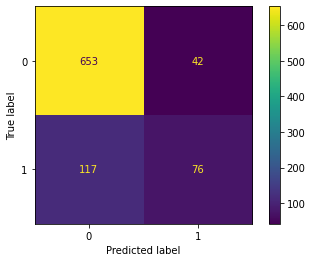

In [98]:
cm = confusion_matrix(y_test, ada_model_test, labels=ada_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada_model.classes_)

disp.plot()
plt.show()

In [90]:
# Sesudah
model = grid_search.best_estimator_

model.fit(X_train, y_train)

model_train = model.predict(X_train)
model_test = model.predict(X_test)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1629
           1       0.79      0.45      0.57       442

    accuracy                           0.86      2071
   macro avg       0.83      0.71      0.74      2071
weighted avg       0.85      0.86      0.84      2071

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       695
           1       0.61      0.36      0.45       193

    accuracy                           0.81       888
   macro avg       0.73      0.65      0.67       888
weighted avg       0.79      0.81      0.79       888



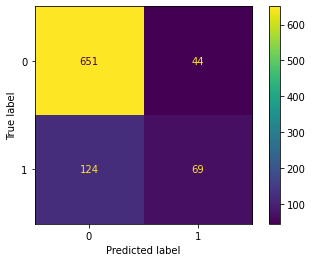

In [99]:
cm = confusion_matrix(y_test, model_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()
plt.show()

> Berdasarkan perbandingan performansi antara model adaboost sebelum dan sesudah dilakukan Hyperparameter Tuning dapat diinterpretasi sebagai berikut:

- Sebelum dilakukannya Hyperparameter Tuning atau model adaboost menggunakan parameter default memiliki model yang overfit, dikarnakan performa test lebih buruk dari pada train, hal ini bisa kemungkinan dikarnakan data pada kolom default_payment_next_month memiliki data yang imballance antara label 0 dan 1.

- Pada model adaboost sebelum hyperparameter tuning memiliki nilai recall pada data testing yaitu sebesar 39% yang berarti kesalahan negatifnya besar, dikarnakan semakin besar nilai recall semakin kecil kesalahan negatif. Dan berdasarkan confusion_matrix model hanya bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 76 data dari 193 data sedangkan memprediksi salah negatif sebanyak 117 data dari 193 data. Sehingga dapat disimpulkan model kurang baik

- Setelah dilakukannya Hyperparameter Tuning model masih tetap memiliki model yang overfit, dikarnakan performa test lebih buruk dari pada train, hal ini bisa kemungkinan dikarnakan data pada kolom default_payment_next_month memiliki data yang imballance antara label 0 dan 1.

- Pada model adaboost setelah hyperparameter tuning memiliki nilai recall pada data testing yaitu sebesar 36% lebih kecil dari pada model yang sebelum di hyperparameter tuning yang berarti kesalahan negatifnya besar. Dan berdasarkan confusion_matrix model hanya bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 69 data dari 193 data sedangkan memprediksi salah negatif sebanyak 124 data dari 193 data. Sehingga dapat disimpulkan model kurang baik

- Dari kesimpulan diatas berdasarkan asumsi pribadi, model yang  diperoleh kurang baik bisa saja disebabkan karna data yang imballace dan bisa dilakukan handling imbalance terlebeh dahulu, atau bisa dengan mencoba model yang lain.

# **8. Model Inference**

In [91]:
inf = df_inf
inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000,2,1,2,22,-1,-1,-1,-1,-1,-1,-9,-9,904,304,0,302,0,913,304,0,302,7676,0
1,100000,1,1,2,33,0,0,0,0,0,0,68073,64109,65302,73056,74034,44825,5000,3200,10000,10000,10000,10000,0
2,50000,1,2,1,32,0,0,0,0,0,0,42163,38252,27396,23584,17272,17634,1472,1500,1282,618,640,644,0
3,100000,1,1,2,24,-1,0,0,0,0,0,33921,34920,36030,37173,35875,36263,1563,1673,1816,1213,1248,1212,0
4,340000,2,3,1,32,0,-1,0,0,0,0,11049,57301,59375,60216,59842,46882,57301,3000,2600,1000,1817,11022,0


#### **Handling Outlier**

In [92]:
# capping outlier
inf = wins.transform(inf)
inf.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000.000,2,1,2,22,-1,-1,-1,-1,-1,-1,-9,-9,904,304,0,302,0,913,304,0,302,7676,0
1,100000.000,1,1,2,33,0,0,0,0,0,0,68073,64109,65302,73056,74034,44825,5000,3200,10000,10000,10000,10000,0
2,50000.000,1,2,1,32,0,0,0,0,0,0,42163,38252,27396,23584,17272,17634,1472,1500,1282,618,640,644,0
3,100000.000,1,1,2,24,-1,0,0,0,0,0,33921,34920,36030,37173,35875,36263,1563,1673,1816,1213,1248,1212,0
4,340000.000,2,3,1,32,0,-1,0,0,0,0,11049,57301,59375,60216,59842,46882,57301,3000,2600,1000,1817,11022,0


### **Feature Selection**

In [93]:
inf_cleaned = inf[['limit_balance','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']]
inf_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,20000.000,-1,-1,-1,-1,-1,-1,0
1,100000.000,0,0,0,0,0,0,0
2,50000.000,0,0,0,0,0,0,0
3,100000.000,-1,0,0,0,0,0,0
4,340000.000,0,-1,0,0,0,0,0


### **Feature Scaling**

In [94]:
num_col = ['limit_balance']

inf_cleaned[num_col] = scaler.transform(inf_cleaned[num_col])
inf_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,0.019,-1,-1,-1,-1,-1,-1,0
1,0.175,0,0,0,0,0,0,0
2,0.078,0,0,0,0,0,0,0
3,0.175,-1,0,0,0,0,0,0
4,0.641,0,-1,0,0,0,0,0


### **Predict**

In [95]:
X_inf = inf_cleaned.drop('default_payment_next_month',axis=1).copy()

In [96]:
X_inf_pred = model.predict(X_inf)
X_inf_pred

array([0, 0, 0, 0, 0])

> Pada tahapan model inference, model yang saya gunakan pada tahapan ini adalah model adaboost yang sudah dilakukan hyperparameter tuning, dan ketika dimasukan data baru model dapat berjalan dan melakukan prediksi yang berarti model dapat digunakan dan dapat berjalan dalam melakukan prediksi terhadap data baru

# **9. Conceptual Problems** 

**1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu `criterion` yang kalian pahami!**

> Parameter Criterion adalah parameter untuk memisahkan atribut. Untuk masing-masing kriteria yang dapat dipilih harus dapat mengoptimalkan nilai split dari decision tree. Dibawah ini adalah beberapa criteria yang dapat di pilih:

- Entropy : criteria ini digunakan untuk mengukur ketidakmurnian dalam atribut tertentu

- Information gain : criteria ini menghitung perbedaan antara entropi sebelum splitting dan rata-rata entropi setelah splitting berdasarkan nilai atribut yang diberikan. information gain tertinggi dipilih sebagai atribut splitting pada node.

- Gini_index : criteria ini mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada Atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata dari himpunan bagian yang dihasilkan. Gini Index memiliki nilai yang berkisar dari 0 (atau 0%) hingga 1 (atau 100%). Dengan 0 mewakili persamaan sempurna dan 1 mewakili tidak sempurna

**2. Apakah fungsi dari `pruning` pada Tree model?**

> Pruning adalah pendekatan yang dapat digunakan untuk menghindari overfitting. Dalam tree model terdapat dua pruning yaitu Pre-pruning & post-pruning

- Dalam Pre-pruning, kita menghentikan pembangunan tree sedikit lebih awal. Kita memilih untuk tidak membagi node jika ukuran terbaiknya di bawah nilai ambang batas. Tetapi sulit untuk memilih titik pemberhentian yang tepat.

- Dalam Post-pruning, kita mencoba masuk lebih dalam dan lebih dalam lagi di tree untuk membangun tree yang lengkap. Jika tree menunjukkan masalah overfitting maka pruning dilakukan sebagai langkah post-pruning

**3. Bagaimana cara memilih `K` yang optimal pada KNN?**

> `K-Nearest Neighbor` atau `KNN` memprediksi kategori titik uji dari label kelas uji yang tersedia dengan mencari jarak antara titik uji dan nilai fitur K Terdekat yang terlatih. Langkah untuk mengklasifikasikan record yang tidak dikenal di KNN adalah pertama-tama menginisialisasi nilai K. Kemudian menghitung jarak antara input uji dan tetangga terdekat yang dilatih K. Setelah itu memeriksa kategori kelas tetangga terdekat dan menentukan jenis input tes yang jatuh. Klasifikasi dilakukan dengan mengambil suara terbanyak. Tapi kemudian kami bertanya-tanya apa nilai K terbaik untuk dipilih dalam data kami? Berikut adalah beberapa langkah untuk menemukan nilai K yang tepat

1. Sebenarnya **tidak ada metode statistik yang ditentukan** untuk menemukan nilai K terbaik 
2. Selanjutnya kita input nilai K berdasarkan **asumsi pribadi** 
3. Hati-hati! menggunakan nilai **kecil** dari nilai K karna akan mengarah ke **batas keputusan yang tidak stabil**
4. Nilai K yang substansial lebih baik untuk klasifikasi karena mengarah pada kelancaran batas keputusan 
5. Buat plot antara tingkat kesalahan dan K yang menunjukkan nilai dalam rentang yang ditentukan dalam data kita. Kemudian pilih nilai K berdasarkan tingkat kesalahan minimum.

**4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!**

> `Cross Validation` digunakan untuk menilai evaluasi model machine learning dengan melatih beberapa model pada subset data train yang tersedia dan mengevaluasinya pada subset data test. Dengan menggunakan cross validation, ada kemungkinan besar dapat mendeteksi overfit dengan mudah. Untuk melakukan `Cross Validation`, kita harus membuat jumlah lipatan (partisi) data yang tetap dan kemudian melakukan analisis pada setiap lipatan. Kemudian rata-rata estimasi kesalahan keseluruhan.

**5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!**

1. Accuracy adalah mengukur seberapa banyak data yang benar diprediksi dibandingkan dengan total data. Pada accuracy tidak cocok digunakan pada data imbalance. Berikut cara perhitungan dari accuracy
> Accuracy = (TP + TN) /(TP + TN + FP + FN)


2. Precision adalah suatu matrix yang menggambarkan seberapa besar jumlah prediksi yang benar. Presisi biasanya fokus pada false positif yang rendah. Berikut cara perhitungan dari Precision
> Precision = (TP) / (TP + FP)

3. Recall adalah suatu matrix yang menggambarkan jumlah data positif yang terprediksi positif. Recall biasanya fokus pada false negatif yang harus rendah. Berikut cara perhitungan dari Recall
> Recall = (TP) / (TP + FN)

4. F1 Score adalah merata - ratakan nilai Precision dan Recall. sangat bagus digunakan jika Precision dan Recall seimbang. Berikut cara perhitungan dari F1 Score
> F1 Score = (2 x Precision x Recall) / (Precision + Recall)


# **10. Conclusions** 

Dari overall analysis dapat disimpulkan bahwa:
1. Pada projek ini dilakukan pembuatan beberapa model machine learning Supervised Classification untuk memprediksi custemer default_payment_next_month pada database yang digunakan
2. berdasarkan EDA - Modeling terdapat beberapa feature yang ditetapkan dari hasil feature selection menggunakan correlation heatmap yang nantinya digunakan dalam tahap pemodelan, berikut featur yang  digunakan `limit_balance`, `pay_1`,`pay_2`,`pay_3`,`pay_4`,`pay_5`,`pay_6` dan `default_payment_next_month` sebagai target
3. Dan pada projek terdapat beberapa model yang digunakan yaitu model:
> - Logistic Regression
> - SVM
> - Decision Tree Classifier
> - RandomForestClassifier
> - KNN
> - Naive Bayes
> - AdaBoost
4. Dari model - model diatas, dilakukan cross validation untuk menentukan model terbaik berdasarkan nilai akurasi mean dan nilai akurasi standar deviasinya sehingga dengan cross validation diperoleh model terbaik yaitu model adaboost dengan nilai akurasi mean 0.842 dan nilai akurasi standar deviasi	0.018
5. Setelah melakukan cross validation, selanjutnya dilakukan hyperparameter tuning terhadap model yang sudah ditentukan, sehingga dengan menggunakan hyperparameter tuning diperoleh best parameter sebagai berikut:
> - algorithm = 'SAMME'
> - base_estimator = DecisionTreeClassifier(max_depth=4)
> - learning_rate = 0.5
> - n_estimators = 200
6. Berdasarkan classification_report diketahui bahwa model adaboost memiliki model yang overfit, dikarnakan performa test lebih buruk dari pada train. Dan berdasarkan nilai Recall model hanya bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 69 data dari 193 data sedangkan memprediksi salah negatif sebanyak 124 data dari 193 data. Sehingga dapat disimpulkan model kurang baik. Hal ini bisa disebabkan karena data pada kolom default_payment_next_month yang imballance atau penentuan parameter pada hyperparameter tuning terlalu besar atau terlalu kecil. Dan untuk mengantisipasi ini, bisa dicoba dengan model yang memiliki nilai mean dan std urutan ke dua setelah model adabosst pada cross validation atau bisa difokuskan pada nilai statndar deviasi yang paling kecil.